<a href="https://colab.research.google.com/github/Aboelsaood23/Aboelsaood23/blob/main/specilaization_2_Course_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#python basics with numpy
import math
import numpy as np


def basic_sigmoid(x):
  s =1/(1+math.exp(-x))
  return s

basic_sigmoid(3)
#we rarely use the "math" library in deep learning because the inputs of the functions are real numbers. In deep learning we mostly use matrices and vectors.#we rarely use the "math" library in deep learning because the inputs of the functions are real numbers. In deep learning we mostly use matrices and vectors.
x = np.array([1, 2, 3])
print(np.exp(x))


print("type of x",type(x))
new_x =np.array(x)
print("exponential of new x",np.exp(new_x))

def sigmoid(x):
  s =1/(1+np.exp(-x))
  return s

print("sigmoid of new x",sigmoid(new_x))

#sigmoid derivative(x) =sigmoid(x)(1-sigmoid(x))
x = np.array([1, 2, 3])
def derivative_sigmoid(x):
  s =sigmoid(x)
  ds= s*(1-s)
  return s

print("sigmoid derivative of new x",derivative_sigmoid(x))

# Two common numpy functions used in deep learning are np.shape and np.reshape().
#1 X.shape is used to get the shape (dimension) of a matrix/vector X.
#2 X.reshape(...) is used to reshape X into some other dimension.
#Implement image2vector() that takes an input of shape (length, height, 3) and returns a vector of shape (length*height*3, 1).
def image2vector(image):
  v =image.reshape(image.shape[0]*image.shape[1]*image.shape[2],1)
  return v
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])
print("\nshape of original image",image.shape)
print("shape of reshaped image",image2vector(image).shape)
print("new reshaped image",image2vector(image))

#Normalizing rows
#Another common technique we use in Machine Learning and Deep Learning is to normalize our data
#It often leads to a better performance because gradient descent converges faster after normalization
# by normalization we mean changing x to x/||x|| (dividing each row vector of x by its norm).

#x_norm takes the norm of each row of x. So x_norm has the same number of rows but only 1 column
#So how did it work when you divided x by x_norm? This is called broadcasting

def normalizeRows(x):
  x_norm =np.linalg.norm(x,axis = 1,keepdims =True)#axis=1 means that the norm is calculated along the second axis,So, the norm is calculated for each row of the array.
  #keepdims=True: This parameter, when set to True, ensures that the dimensions of the output are the same as the input
  x =x/x_norm
  return x

x = np.array([
    [0, 3, 4],
    [1, 6, 4]])
print("normalizeRows(x) = " + str(normalizeRows(x)))
print("shape befor normalizerwos",x.shape)
print("normalizeRows shape " , normalizeRows(x).shape)

# GRADED FUNCTION: softmax

def softmax(x):
  x_exp = np.exp(x)
  x_sum = np.sum(x_exp,axis=1,keepdims=True)
  s = x_exp/x_sum
  return s

x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]])
print("softmax(x) = " + str(softmax(x)))


[ 2.71828183  7.3890561  20.08553692]
type of x <class 'numpy.ndarray'>
exponential of new x [ 2.71828183  7.3890561  20.08553692]
sigmoid of new x [0.73105858 0.88079708 0.95257413]
sigmoid derivative of new x [0.73105858 0.88079708 0.95257413]

shape of original image (3, 3, 2)
shape of reshaped image (18, 1)
new reshaped image [[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]
normalizeRows(x) = [[0.         0.6        0.8       ]
 [0.13736056 0.82416338 0.54944226]]
shape befor normalizerwos (2, 3)
normalizeRows shape  (2, 3)


In [ ]:
import time
x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0]
tic =time.process_time()
dot =0
for i in range(len(x1)):
  dot+=x1[i]*x2[i] #dot product multiply eacj elemnent by crossponding eelement, then do summation for each results
toc =time.process_time()
print("dot = "+str(dot)+"\n computation time= " + str(1000*(toc - tic)) + "ms")


### CLASSIC OUTER PRODUCT IMPLEMENTATION ###
tic = time.process_time()
outer = np.zeros((len(x1),len(x2))) # we create a len(x1)*len(x2) matrix with only zeros
for i in range(len(x1)):
    for j in range(len(x2)):
        outer[i,j] = x1[i]*x2[j] # multiply each element on x1 to all elements of x2, then move to next element and so on, so final shape will be (15,15)
toc = time.process_time()
print ("outer = " + str(outer) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### CLASSIC ELEMENTWISE IMPLEMENTATION ###
tic = time.process_time()
mul = np.zeros(len(x1))
for i in range(len(x1)):
    mul[i] = x1[i]*x2[i] # multiply each element on crossponding element of x2 only so final shape(15,)
toc = time.process_time()
print ("elementwise multiplication = " + str(mul) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")


### CLASSIC GENERAL DOT PRODUCT IMPLEMENTATION ###
W = np.random.rand(3,len(x1)) # Random 3*len(x1) numpy array
print("\ngeneral dot product")
print("values of w",W,"shape of w",W.shape)
tic = time.process_time()
gdot = np.zeros(W.shape[0])
for i in range(W.shape[0]):
    for j in range(len(x1)):
        gdot[i] += W[i,j]*x1[j] #here w is on shape(3,15), and x on shape(15,1), so final result on shape(3,1)
toc = time.process_time()
print ("gdot = " + str(gdot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

###let's do all operations with victoriation
print("\n\n\n\n\nvictorization results")
x1 = [9, 2, 5, 0, 0, 7, 5, 0, 0, 0, 9, 2, 5, 0, 0]
x2 = [9, 2, 2, 9, 0, 9, 2, 5, 0, 0, 9, 2, 5, 0, 0]

### VECTORIZED DOT PRODUCT OF VECTORS ###
tic = time.process_time()
dot = np.dot(x1,x2)
toc = time.process_time()
print ("dot = " + str(dot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### VECTORIZED OUTER PRODUCT ###
tic = time.process_time()
outer = np.outer(x1,x2)
toc = time.process_time()
print ("outer = " + str(outer) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### VECTORIZED ELEMENTWISE MULTIPLICATION ###
tic = time.process_time()
mul = np.multiply(x1,x2)
toc = time.process_time()
print ("elementwise multiplication = " + str(mul) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

### VECTORIZED GENERAL DOT PRODUCT ###
tic = time.process_time()
dot = np.dot(W,x1)
toc = time.process_time()
print ("gdot = " + str(dot) + "\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")



dot = 278
 computation time= 0.24287600000150178ms
outer = [[81. 18. 18. 81.  0. 81. 18. 45.  0.  0. 81. 18. 45.  0.  0.]
 [18.  4.  4. 18.  0. 18.  4. 10.  0.  0. 18.  4. 10.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [63. 14. 14. 63.  0. 63. 14. 35.  0.  0. 63. 14. 35.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 18. 18. 81.  0. 81. 18. 45.  0.  0. 81. 18. 45.  0.  0.]
 [18.  4.  4. 18.  0. 18.  4. 10.  0.  0. 18.  4. 10.  0.  0.]
 [45. 10. 10. 45.  0. 45. 10. 25.  0.  0. 45. 10. 25.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

In [ ]:
#logistic regression lab
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage



Mounted at /content/drive


shape of train dataset (209, 64, 64, 3)
shape of train labels (209,)
shape of test dataset (50, 64, 64, 3)
shape of test labels (50,)
shape of new labels of train data (1, 209)
shape of new labels of test data (1, 50)
y =1 it's a  non-cat  picture


Shapes after flatten
train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 71 49 38 70]


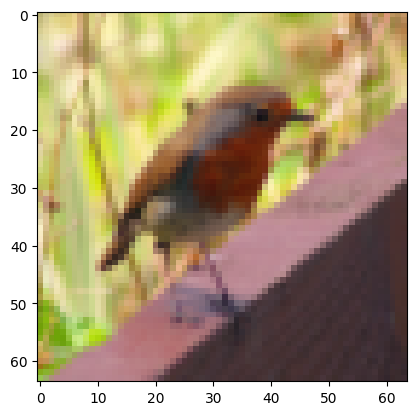

In [ ]:
#data type is h5
#.h5" file extension typically indicates that the file is in the Hierarchical Data Format version 5 (HDF5)

train_path ='/content/drive/MyDrive/Colab Notebooks/data/DL Specialization/train_catvnoncat.h5'
train_dataset =h5py.File(train_path,"r")
test_path ='/content/drive/MyDrive/Colab Notebooks/data/DL Specialization/test_catvnoncat.h5'
test_dataset =h5py.File(test_path,"r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:])
train_set_y = np.array(train_dataset["train_set_y"][:])
test_set_x_orig = np.array(test_dataset["test_set_x"][:])
test_set_y = np.array(test_dataset["test_set_y"][:])

#data type is h5
#.h5" file extension typically indicates that the file is in the Hierarchical Data Format version 5 (HDF5)

train_path ='/content/drive/MyDrive/Colab Notebooks/data/DL Specialization/train_catvnoncat.h5'
train_dataset =h5py.File(train_path,"r")
test_path ='/content/drive/MyDrive/Colab Notebooks/data/DL Specialization/test_catvnoncat.h5'
test_dataset =h5py.File(test_path,"r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:])
train_set_y = np.array(train_dataset["train_set_y"][:])
test_set_x_orig = np.array(test_dataset["test_set_x"][:])
test_set_y = np.array(test_dataset["test_set_y"][:])

#shape of trains data set
print("shape of train dataset",train_set_x_orig.shape)
#shape of train labels
print("shape of train labels",train_set_y.shape)
#shape of test_set data
print("shape of test dataset",test_set_x_orig.shape)
print("shape of test labels",test_set_y.shape)
#get all classes of labels
classes = np.array(test_dataset["list_classes"][:])

#rshape habels
train_set_y = train_set_y.reshape((1, train_set_y.shape[0]))
test_set_y = test_set_y.reshape((1, test_set_y.shape[0]))
print("shape of new labels of train data",train_set_y.shape) #it's like turning values of labels from column vector to row vector
print("shape of new labels of test data",test_set_y.shape)  #it's like turning values of labels from column vector to row vector

#get example number 10 of train dataset
index =10
plt.imshow(train_set_x_orig[index])
print(f"y ={test_set_y[0,index]} it's a  " + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + "  picture")

#Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px*num_px*3, 1).
train_set_x_flatten =train_set_x_orig.reshape((train_set_x_orig.shape[1]*train_set_x_orig.shape[2]*train_set_x_orig.shape[3]),train_set_x_orig.shape[0])
test_set_x_flatten =test_set_x_orig.reshape((test_set_x_orig.shape[1]*test_set_x_orig.shape[2]*test_set_x_orig.shape[3]),test_set_x_orig.shape[0])
print("\n\nShapes after flatten")
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

#One common preprocessing step in matching learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array.
# But for picture datasets, it is simpler and more convenient and works almost as well to just "we don't need to do it with this dataset"
#it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

#this final results of preprocessing
train_set_x =train_set_x_flatten/255.
test_set_x =test_set_x_flatten/255.



value of w [[0.]
 [0.]]
value of b 0
dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553
Cost after iteration 0: 5.801545
Cost after iteration 100: 1.055933
Cost after iteration 200: 0.378303
Cost after iteration 300: 0.363595
Cost after iteration 400: 0.356242
Cost after iteration 500: 0.349210
Cost after iteration 600: 0.342420
Cost after iteration 700: 0.335860
Cost after iteration 800: 0.329517
Cost after iteration 900: 0.323380

Optimize Results
w = [[-0.64226437]
 [-0.43498153]]
b = 2.2025594747904087
dw = [[ 0.06282959]
 [-0.01416124]]
db = -0.04847508604218078
len of cost function 10

values of predict function
predictions = [[1. 1. 0.]]


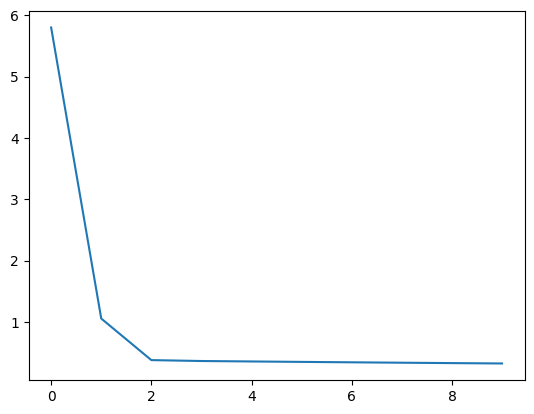

In [ ]:
#design algorithm logistic
# each image consist of 12287 pixel, we pass eah image on neurla network of one layer, with one neuron to get final prediction

#start by some helper function
#sigmoid
def sigmoid(x):
  z =1/(1+np.exp(-x))
  return z

#Initializing parameters, You have to initialize w as a vector of zeros
def initialize_with_zeros(dim):
  w =np.zeros((dim,1))
  b = 0 # this one is supposed to be vector (12278,1) , but braodcasting will happen  so no need to make it as avector
  return w,b # w is on shape of volumn vector so later we will have to reshape to row vector using .T

#chek  this function of initializing values
dim = 2
w,b = initialize_with_zeros(dim)
print("value of w",w)
print('value of b',b)

# note : this propagate function based on architecture on lab"check images"
def propagate(w,b,x,y):
  m =x.shape[1]
  A =sigmoid(np.dot(w.T,x)+b)
  cost = np.sum(((- np.log(A))*y + (-np.log(1-A))*(1-y)))/m
  dj_dw = (np.dot(x,(A-y).T))/m
  dj_db =np.sum(A-y)/m
  grads ={"dw":dj_dw,
          "db":dj_db}
  return grads,cost

#let's check this function
w, b,x, y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, x, y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))



#You have initialized your parameters.
#You are also able to compute a cost function and its gradient.
#Now, you want to update the parameters using gradient descent.

def optimize(w,b,x,y,num_iterations,learning_rate,print_cost=False):
  m=x.shape[1]
  costs=[] # to save cost value each iteration
  for i in range(num_iterations):
    grads,cost =propagate(w,b,x,y)
    dw =grads['dw']
    db =grads['db']
    w =w - (learning_rate*dw)
    b =b - (learning_rate*db)
    if i % 100 == 0:
      costs.append(cost)

        # Print the cost every 100 training iterations
    if print_cost and i % 100 == 0:
      print ("Cost after iteration %i: %f" %(i, cost))
  params ={"w":w,
           "b":b}
  grads ={"dw":dw,"db":db}
  return params,grads,costs # theses params values and grads are last values

#check this function
#note : here we didn't initialize values of x, we used values of w,b we set befor
params,grads,costs =optimize(w,b,x,y,num_iterations=1000,learning_rate =0.009,print_cost=True)

print("\nOptimize Results")
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

#plot cost function
print("len of cost function",len(costs))
plt.plot(costs)

# The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X
# to implement prdict function we will implement two steps
# 1 calculate a =sig(w.TX+b)
# 2 convert values to zero and one
def predict(w,b,x):
  m =x.shape[1]
  y_prediction = np.zeros((1,m))
  w =w.reshape(x.shape[0],1)
  A =sigmoid(np.dot(w.T,x)+b)
  for i in range(A.shape[1]):
    y_prediction[0,i] =1 if A[0,i] >=0.5 else 0
  return y_prediction

#let's check function of predict
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print("\nvalues of predict function")
print ("predictions = " + str(predict(w, b, X)))


Cost after iteration 0: 0.693147
Cost after iteration 100: 0.709726
Cost after iteration 200: 0.657712
Cost after iteration 300: 0.614611
Cost after iteration 400: 0.578001
Cost after iteration 500: 0.546372
Cost after iteration 600: 0.518331
Cost after iteration 700: 0.492852
Cost after iteration 800: 0.469259
Cost after iteration 900: 0.447139
Cost after iteration 1000: 0.426262
Cost after iteration 1100: 0.406617
Cost after iteration 1200: 0.388723
Cost after iteration 1300: 0.374678
Cost after iteration 1400: 0.365826
Cost after iteration 1500: 0.358532
Cost after iteration 1600: 0.351612
Cost after iteration 1700: 0.345012
Cost after iteration 1800: 0.338704
Cost after iteration 1900: 0.332664
train accuracy: 91.38755980861244 %
test accuracy: 34.0 %


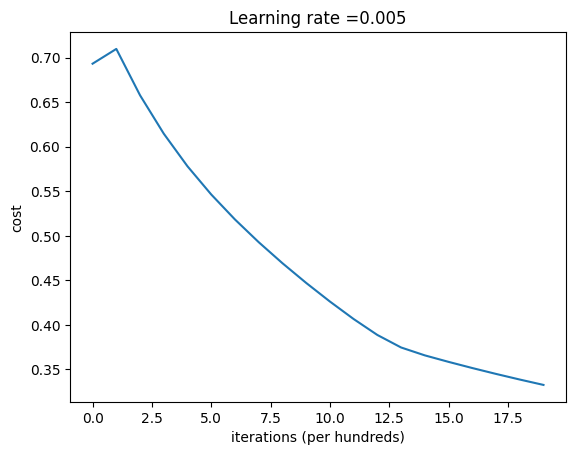

learning rate is: 0.01
Cost after iteration 0: 0.693147
Cost after iteration 100: 2.321789
Cost after iteration 200: 2.830947
Cost after iteration 300: 1.022904
Cost after iteration 400: 1.480529
Cost after iteration 500: 1.909390
Cost after iteration 600: 2.028455
Cost after iteration 700: 1.618240
Cost after iteration 800: 1.294605
Cost after iteration 900: 1.200054
Cost after iteration 1000: 1.127053
Cost after iteration 1100: 1.065931
Cost after iteration 1200: 1.011810
Cost after iteration 1300: 0.962241
Cost after iteration 1400: 0.915954
train accuracy: 71.29186602870814 %
test accuracy: 34.0 %

-------------------------------------------------------

learning rate is: 0.001
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.605784
Cost after iteration 200: 0.589938
Cost after iteration 300: 0.577890
Cost after iteration 400: 0.567791
Cost after iteration 500: 0.559013
Cost after iteration 600: 0.551207
Cost after iteration 700: 0.544146
Cost after iteration 800: 0.537

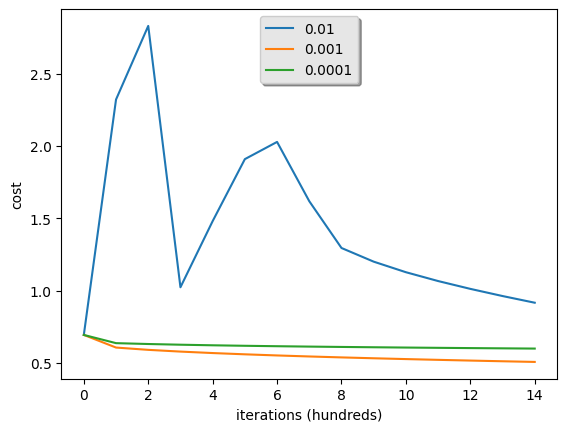

In [ ]:
#Merge all functions into a model
def model(x_train,y_train,x_test,y_test,num_iterations=2000,learning_rate=0.5,print_cost=False):
  #initialie values of w,b with zeros
  w,b =initialize_with_zeros(x_train.shape[0])

  #note : here propagate function is implemented on optimize values
  parameters,grads,costs =optimize(w,b,x_train,y_train,num_iterations ,learning_rate,print_cost=True)
  w = parameters["w"]
  b = parameters["b"]

  y_prediction_test  = predict(w, b, x_test)
  y_prediction_train = predict(w, b, x_train)
  print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
  d = {"costs": costs,
         "Y_prediction_test": y_prediction_test,
         "Y_prediction_train" : y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

  return d

#let's check this function
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = False)

# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()


#try different values of learning rates
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

#try this alogorithm with one image